**Name**: Bharadwaj Chukkala

UID: 118341705



##**Plotting Joint Torques of KUKA LWR WIIA**

**Conditions**: 


*   Consider  a  KUKA  WIIA  robot  with  a  pen  (L=10  cm)  attached  as  the  end  effector  of  the  robot  along  Z 
direction of the  local frame. 
*   Assume that joint 3 is locked and will not be able to 
move so the Jacobian matric is square matrix.






The total weight of the KUKA LWR is 23.9kg ~ 24kg

Assumption: Considering the weight of each link of KUKA to be equal due to the lack of sufficient data.

In [214]:
M = 24
n_links = 6
m = M/n_links

# Taking Gravitational Constant NEGATIVE to obtain positive Potential Energy
g = -9.81

##**Importing Libraries**


In [215]:
import sympy as sym
sym.init_printing()

from sympy import *

from sympy.physics.vector import Vector
Vector.simp = True

In [216]:
import numpy as np
from numpy import *
import math

Initialization of Variables

In [217]:
theta1, theta2, theta3, theta4, theta5, theta6, theta7 = sym.symbols("\\theta_1, theta_2, theta_3, theta_4, theta_5, theta_6, theta_7")
d1, d3, d5, d7 = sym.symbols("d_1,d_3,d_5,d_7")

d1 = 360
d3 = 420
d5 = 399.5
d7 = 205.5

## Tranformation ***Matrices*** (Forward Kinematics)

**Calculating Transformation Matrices** from DH Parameters

In [218]:
A1 = sym.Matrix([[sym.cos(theta1), 0, -sym.sin(theta1), 0], [sym.sin(theta1), 0, sym.cos(theta1), 0], [0, -1, 0, d1], [0, 0, 0, 1]])
A1

⎡cos(\theta₁)  0   -sin(\theta₁)   0 ⎤
⎢                                    ⎥
⎢sin(\theta₁)  0   cos(\theta₁)    0 ⎥
⎢                                    ⎥
⎢     0        -1        0        360⎥
⎢                                    ⎥
⎣     0        0         0         1 ⎦

In [219]:
A2 = sym.Matrix([[sym.cos(theta2), 0, sym.sin(theta2), 0], [sym.sin(theta2), 0, -sym.cos(theta2), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
A2

⎡cos(θ₂)  0  sin(θ₂)   0⎤
⎢                       ⎥
⎢sin(θ₂)  0  -cos(θ₂)  0⎥
⎢                       ⎥
⎢   0     1     0      0⎥
⎢                       ⎥
⎣   0     0     0      1⎦

In [220]:
A3 = sym.Matrix([[sym.cos(0), 0, sym.sin(0), 0], [sym.sin(0), 0, -sym.cos(0), 0], [0, 1, 0, d3], [0, 0, 0, 1]])
A3

⎡1  0  0    0 ⎤
⎢             ⎥
⎢0  0  -1   0 ⎥
⎢             ⎥
⎢0  1  0   420⎥
⎢             ⎥
⎣0  0  0    1 ⎦

In [221]:
A4 = sym.Matrix([[sym.cos(theta4), 0, -sym.sin(theta4), 0], [sym.sin(theta4), 0, sym.cos(theta4), 0], [0, -1, 0, 0], [0, 0, 0, 1]])
A4

⎡cos(θ₄)  0   -sin(θ₄)  0⎤
⎢                        ⎥
⎢sin(θ₄)  0   cos(θ₄)   0⎥
⎢                        ⎥
⎢   0     -1     0      0⎥
⎢                        ⎥
⎣   0     0      0      1⎦

In [222]:
A5 = sym.Matrix([[sym.cos(theta5), 0, -sym.sin(theta5), 0], [sym.sin(theta5), 0, sym.cos(theta5), 0], [0, -1, 0, d5], [0, 0, 0, 1]])
A5

⎡cos(θ₅)  0   -sin(θ₅)    0  ⎤
⎢                            ⎥
⎢sin(θ₅)  0   cos(θ₅)     0  ⎥
⎢                            ⎥
⎢   0     -1     0      399.5⎥
⎢                            ⎥
⎣   0     0      0        1  ⎦

In [223]:
A6 = sym.Matrix([[sym.cos(theta6), 0, sym.sin(theta6), 0], [sym.sin(theta6), 0, -sym.cos(theta6), 0], [0, 1, 0, 0], [0, 0, 0, 1]])
A6

⎡cos(θ₆)  0  sin(θ₆)   0⎤
⎢                       ⎥
⎢sin(θ₆)  0  -cos(θ₆)  0⎥
⎢                       ⎥
⎢   0     1     0      0⎥
⎢                       ⎥
⎣   0     0     0      1⎦

In [224]:
A7 = sym.Matrix([[sym.cos(theta7), -sym.sin(theta7), 0, 0], [sym.sin(theta7), sym.cos(theta7), 0, 0], [0, 0, 1, d7], [0, 0, 0, 1]])
A7

⎡cos(θ₇)  -sin(θ₇)  0    0  ⎤
⎢                           ⎥
⎢sin(θ₇)  cos(θ₇)   0    0  ⎥
⎢                           ⎥
⎢   0        0      1  205.5⎥
⎢                           ⎥
⎣   0        0      0    1  ⎦

**Final Transformation Matrix**

In [225]:
A = A1*A2*A3*A4*A5*A6*A7
A

⎡(((sin(θ₂)⋅sin(θ₄)⋅cos(\theta₁) + cos(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin
⎢                                                                             
⎢(((sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) + sin(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) + sin
⎢                                                                             
⎢                                                               ((-sin(θ₂)⋅sin
⎢                                                                             
⎣                                                                             

(\theta₁)⋅sin(θ₅))⋅cos(θ₆) + (-sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄) + sin(θ₄)⋅cos(\the
                                                                              
(θ₅)⋅cos(\theta₁))⋅cos(θ₆) + (-sin(\theta₁)⋅sin(θ₂)⋅cos(θ₄) + sin(\theta₁)⋅sin
                                                                              
(θ₄) - cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) + (-sin(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₂))⋅cos(θ₅)
                                                   

##**Calculating Z and O**

***Calculting Z***

In [226]:
A12 = A1*A2
A24 = A12*A3*A4
A45 = A24*A5
A56 = A45*A6
A67 = A56*A7


In [227]:
Z0 = sym.Matrix([0,0,1])
Z1 = A1[:3,2]
Z2 = A12[:3,2]
Z4 = A24[:3,2]
Z5 = A45[:3,2]
Z6 = A56[:3,2]
Z7 = A67[:3,2]
sym.simplify(Z7)

⎡(-sin(\theta₁)⋅sin(θ₅) + cos(\theta₁)⋅cos(θ₅)⋅cos(θ₂ - θ₄))⋅sin(θ₆) + sin(θ₂ 
⎢                                                                             
⎢(sin(\theta₁)⋅cos(θ₅)⋅cos(θ₂ - θ₄) + sin(θ₅)⋅cos(\theta₁))⋅sin(θ₆) + sin(\the
⎢                                                                             
⎣                         -sin(θ₆)⋅sin(θ₂ - θ₄)⋅cos(θ₅) + cos(θ₆)⋅cos(θ₂ - θ₄)

- θ₄)⋅cos(\theta₁)⋅cos(θ₆)⎤
                          ⎥
ta₁)⋅sin(θ₂ - θ₄)⋅cos(θ₆) ⎥
                          ⎥
                          ⎦

**Calculating O**

In [228]:
O0 = sym.Matrix([0, 0, 0])
O1 = A1[:3,3]
O2 = A12[:3,3]
O4 = A24[:3,3]
O5 = A45[:3,3]
O6 = A56[:3,3]
O7 = A67[:3,3]


In [229]:
x_pos = A[0,3]; y_pos = A[1,3]; z_pos = A[2,3];

Using the **2nd Method (Differentiation Method)** to obtain Jacobian

In [230]:
c11 = sym.diff(x_pos, theta1)
c12 = sym.diff(x_pos, theta2)
c13 = sym.diff(x_pos, theta4)
c14 = sym.diff(x_pos, theta5)
c15 = sym.diff(x_pos, theta6)
c16 = sym.diff(x_pos, theta7)

c21 = sym.diff(y_pos, theta1)
c22 = sym.diff(y_pos, theta2)
c23 = sym.diff(y_pos, theta4)
c24 = sym.diff(y_pos, theta5)
c25 = sym.diff(y_pos, theta6)
c26 = sym.diff(y_pos, theta7)

c31 = sym.diff(z_pos, theta1)
c32 = sym.diff(z_pos, theta2)
c33 = sym.diff(z_pos, theta4)
c34 = sym.diff(z_pos, theta5)
c35 = sym.diff(z_pos, theta6)
c36 = sym.diff(z_pos, theta7)

In [231]:
J = sym.Matrix([[c11, c12, c13, c14, c15, c16], [c21, c22, c23, c24, c25, c26],[c31, c32, c33, c34, c35, c36],[Z1,Z2,Z4,Z5,Z6,Z7]]) 


You can use the 1st Method aswell to Find the Jacobian

In [232]:
P1 = -m*g*(A1[2,3])/2
P2 = -2*m*g*(A12[2,3]+A1[2,3])/2
P3 = -3*m*g*(A24[2,3]+A12[2,3])/2
P4 = -4*m*g*(A45[2,3]+A24[2,3])/2
P5 = -5*m*g*(A56[2,3]+A45[2,3])/2
P6 = -6*m*g*(A67[2,3]+A56[2,3])/2

PE_Vec = sym.Matrix([[P1], [P2], [P3], [P4], [P5], [P6]])
PE_Vec


⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                            31352.76⋅sin(θ₂)⋅
⎢                                                                             
⎢                                                             78381.9⋅sin(θ₂)⋅
⎢                                                                             
⎣-24191.46⋅(-sin(θ₂)⋅sin(θ₄) - cos(θ₂)⋅cos(θ₄))⋅cos(θ₆) + 24191.46⋅(-sin(θ₂)⋅c

                    7063.2                                                    
                                                   

In [233]:
Wrench = sym.Matrix([[0], [-5], [0], [0], [0], [0]])
PE_Vec-J.T * Wrench

⎡5⋅(205.5⋅(sin(θ₂)⋅sin(θ₄)⋅cos(\theta₁) + cos(\theta₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅
⎢                                                                             
⎢               5⋅(205.5⋅sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) + 205.5⋅sin(\theta₁)⋅cos
⎢                                                                             
⎢                    5⋅(-205.5⋅sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) - 205.5⋅sin(\theta
⎢                                                                             
⎢                                                          5⋅(-205.5⋅(sin(\the
⎢                                                                             
⎢                5⋅(205.5⋅(sin(\theta₁)⋅sin(θ₂)⋅sin(θ₄) + sin(\theta₁)⋅cos(θ₂)
⎢                                                                             
⎣                                                         -24191.46⋅(-sin(θ₂)⋅

) - 205.5⋅sin(\theta₁)⋅sin(θ₅))⋅sin(θ₆) + 5⋅(205.5⋅sin(θ₂)⋅cos(\theta₁)⋅cos(θ₄
                                                   

##***Inverse Dynamics***



In [234]:
q = sym.Matrix([0,30,-45,0,75,0])*(pi/180)
N = 200
theta = linspace(float(pi/2), float((5*pi)/2),num=N)


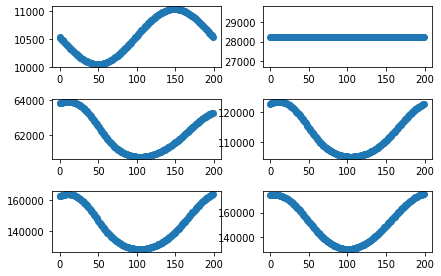

In [235]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(nrows=3, ncols=2)
figure.tight_layout()

Torque_1 = []
Torque_2 = []
Torque_3 = []
Torque_4 = []
Torque_5 = []
Torque_6 = []


for j in range(0,N):
  vel_x = -100.0 * (2*pi/5)* sin(theta[j])  
  vel_z = 100.0 * (2*pi/5)* cos(theta[j])

  Velocity_vector = Matrix([vel_x,0.0, vel_z, 0.0, 0.0, 0.0])

  Inverse_Jacobian = J.evalf(3, subs={theta1:q[0],theta2:q[1],theta4:q[2],theta5:q[3],theta6:q[4],theta7:q[5]}).inv()
  
  Ang_vel = Inverse_Jacobian*Velocity_vector

  q = q + (Ang_vel*(5/N))

  Potential_energy = PE_Vec.evalf(3, subs={theta1:q[0],theta2:q[1],theta4:q[2],theta5:q[3],theta6:q[4],theta7:q[5]})

  Joint_Torque = Potential_energy - J.evalf(3, subs={theta1:q[0],theta2:q[1],theta4:q[2],theta5:q[3],theta6:q[4],theta7:q[5]}).T * Wrench

  Torque_1.append(Joint_Torque[0]) 
  Torque_2.append(Joint_Torque[1]) 
  Torque_3.append(Joint_Torque[2]) 
  Torque_4.append(Joint_Torque[3]) 
  Torque_5.append(Joint_Torque[4]) 
  Torque_6.append(Joint_Torque[5])
 
plt.title('Joint Torque vs Time')

plt.subplot(3, 2, 1)
plt.scatter(range(0,200),Torque_1)

plt.subplot(3, 2, 2)
plt.scatter(range(0,200),Torque_2)

plt.subplot(3, 2, 3)
plt.scatter(range(0,200),Torque_3)

plt.subplot(3, 2, 4)
plt.scatter(range(0,200),Torque_4)

plt.subplot(3, 2, 5)
plt.scatter(range(0,200),Torque_5)

plt.subplot(3, 2, 6)
plt.scatter(range(0,200),Torque_6)



plt.show()
